# Import

In [2]:
#The import of various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset Use

In [3]:
data = pd.read_excel('Immunotherapy.xlsx')

In [4]:
data.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [5]:
print(data)

    sex  age   Time  Number_of_Warts  Type  Area  induration_diameter  \
0     1   22   2.25               14     3    51                   50   
1     1   15   3.00                2     3   900                   70   
2     1   16  10.50                2     1   100                   25   
3     1   27   4.50                9     3    80                   30   
4     1   20   8.00                6     1    45                    8   
..  ...  ...    ...              ...   ...   ...                  ...   
85    1   40   5.50                8     3    69                    5   
86    1   38   7.50                8     2    56                   45   
87    1   46  11.50                4     1    91                   25   
88    1   32  12.00                9     1    43                   50   
89    2   23   6.75                6     1    19                    2   

    Result_of_Treatment  
0                     1  
1                     1  
2                     1  
3                  

In [6]:
print(f'numbers of rows and colums in this data set: {data.shape}')

numbers of rows and colums in this data set: (90, 8)


In [7]:
#dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


# Preprocessing

In [8]:
#Preprocess the data
def preprocess(data):
    # Remove any rows with missing values
    data.dropna(inplace=True)
    
    #Separate the features (X) and target variable (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess(data)

# Training the model

In [9]:
#Model Training
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Testing the model

In [10]:
#Model Testing
y_pred = model.predict(X_test)

# Evaluation the model

In [11]:
#Model Evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.7777777777777778
Confusion Matrix:
[[ 1  4]
 [ 0 13]]


# Ploting Training & Testing Data for the SVM

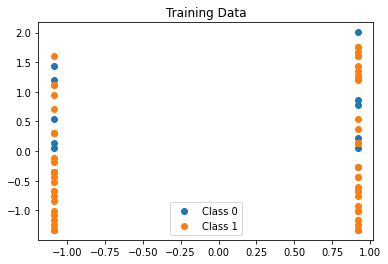

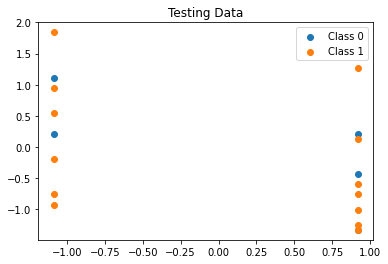

In [13]:
#We need to plot those training and testing data to make it easier for us to draw the Decision Boundary in the next step
def plot_data(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0") #Class 0 points are represented in Blue
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1") #Class 1 points are represented in Orange
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(X_train, y_train, "Training Data")
plot_data(X_test, y_test, "Testing Data")

# Decision Boundary Plot (SVM)

In [14]:
#Function of plotting the Decision Boundary that separates class 0 points from class 1 points in each of Training & Testing data
def plot_decision_boundary(model, X, y, title):
    # Set min and max values for the features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a meshgrid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    #Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    #Reshape the predictions
    Z = Z.reshape(xx.shape)

    #Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)

    #Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()